## Laboratorio 3 - Clasificación

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 3 - Clasificador de Residuos

In [1]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
from skimage.transform import rescale
#Matplotlib
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
import time
import seaborn as sns


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### 1) Crea un clasificador que permita saber qué tipo de resiudo aparece en una imagen. Realiza al menos dos configuraciones y dibuja una tabla donde se muestre la precisión del modelo

## Carga y Visualización de Datos

In [2]:
#Iniciamos contador
start = time.time()

dirname = os.path.join(os.getcwd(), 'garbage')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot = ''
cant = 0

print("Leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot != root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

Leyendo imagenes de  C:\Users\josei\Datamining_UFV\Lab3\entregable3\garbage\
C:\Users\josei\Datamining_UFV\Lab3\entregable3\garbage\cardboard 1
C:\Users\josei\Datamining_UFV\Lab3\entregable3\garbage\glass 403
C:\Users\josei\Datamining_UFV\Lab3\entregable3\garbage\metal 501
C:\Users\josei\Datamining_UFV\Lab3\entregable3\garbage\paper 410
C:\Users\josei\Datamining_UFV\Lab3\entregable3\garbage\plastic 594
C:\Users\josei\Datamining_UFV\Lab3\entregable3\garbage\trash 482
Directorios leidos: 6
Imagenes en cada directorio [404, 501, 410, 594, 482, 136]
suma Total de imagenes en subdirs: 2527


In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  2527
0 cardboard
1 glass
2 metal
3 paper
4 plastic
5 trash
Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


In [4]:
X.shape

(2527, 384, 512, 3)

In [5]:
arr1_transpose = X.transpose()
arr1_transpose.shape
z = np.concatenate(arr1_transpose, axis=0)
z = np.concatenate(z, axis=0)
z = z.transpose()
dataframe = pd.DataFrame(z)

In [6]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,589814,589815,589816,589817,589818,589819,589820,589821,589822,589823
0,240,241,243,245,245,243,241,239,242,244,...,70,71,71,70,70,69,69,68,68,68
1,206,207,208,209,210,209,209,208,211,210,...,121,123,122,121,120,119,118,116,115,115
2,248,248,248,247,247,246,246,246,246,245,...,200,200,203,204,205,207,208,208,207,207
3,81,82,83,83,84,85,86,86,87,87,...,142,142,145,145,146,147,147,148,149,149
4,141,140,140,139,140,142,144,145,146,146,...,225,224,224,225,226,227,227,226,225,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,233,233,233,233,233,233,233,233,232,232,...,74,74,74,74,74,75,75,76,76,76
2523,233,233,233,233,233,233,233,233,233,233,...,29,27,29,29,30,30,29,28,26,24
2524,224,224,224,224,224,224,224,224,225,225,...,66,66,66,66,66,65,65,64,64,64
2525,216,216,216,216,216,216,216,216,218,218,...,64,64,63,63,63,63,63,63,63,63


In [7]:
#Separamos en test de entrenamiento y de validacion 80-20
X_train, X_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.2, random_state=42)

In [8]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,589814,589815,589816,589817,589818,589819,589820,589821,589822,589823
1174,210,210,210,210,210,210,210,210,208,208,...,143,143,142,142,142,142,142,142,142,142
1240,220,220,220,220,220,220,220,220,219,219,...,79,79,76,78,80,80,79,78,79,79
1039,209,209,209,209,209,209,209,209,206,206,...,154,154,155,155,156,157,157,158,159,159
2405,192,192,192,192,192,192,192,192,192,192,...,130,130,131,131,131,130,130,129,129,129
655,244,244,244,243,243,242,242,242,242,242,...,132,130,131,129,126,123,122,120,119,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,232,232,232,232,232,232,232,232,232,232,...,183,183,182,182,182,182,182,182,182,182
2144,218,218,218,218,218,218,218,218,217,217,...,180,180,179,179,179,178,178,178,177,177
571,188,189,190,192,193,193,192,192,193,193,...,212,212,212,212,212,212,212,212,212,212
1197,159,159,159,159,159,159,159,159,158,158,...,38,38,38,38,38,38,38,38,38,38


In [9]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,589814,589815,589816,589817,589818,589819,589820,589821,589822,589823
1167,255,255,255,255,255,255,255,255,255,255,...,193,193,193,193,193,193,193,193,193,193
2435,244,244,244,244,244,244,244,244,242,242,...,51,53,52,51,51,52,53,55,57,59
226,160,164,168,167,169,173,176,176,178,173,...,14,13,12,13,15,17,18,18,18,18
1818,255,255,255,255,255,255,255,255,255,255,...,150,150,150,150,150,150,150,150,150,150
1136,108,109,109,103,92,80,72,69,58,60,...,203,203,203,203,203,203,203,203,203,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,209,209,209,210,210,211,211,211,211,211,...,179,179,178,178,178,178,178,178,178,178
2073,209,209,209,208,208,207,207,207,206,206,...,161,161,163,163,163,163,163,163,163,163
802,241,241,241,241,241,241,241,241,241,241,...,162,162,161,161,161,161,161,161,161,161
1198,255,255,255,255,255,255,255,255,255,255,...,166,166,169,169,169,170,170,171,171,171


In [10]:
#Volvemos a separar los datos de validacion 95-5 sobre X_test e y_test
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.95, random_state=42)

In [11]:
gnb = GaussianNB()
datosEntreno = gnb.fit(X_train, y_train)
prediccionBayes = gnb.predict(X_test)

In [12]:
matrizConfusion = confusion_matrix(y_test,prediccionBayes)
print(matrizConfusion)

[[56 11  3  1  2  2]
 [ 5 22 21  0 29 20]
 [15 14 24  6 18 11]
 [19 12 13 16 45  5]
 [ 8  8  2  0 66  5]
 [ 3  3  4  1  3  8]]


In [13]:
#Precision del modelo
precision = round(accuracy_score(y_test, prediccionBayes), 3)
print('Precisión SVC:', round((precision*100),2), '%')
print('Error SVC:', round(100 - (precision*100),2), '%')

Precisión SVC: 39.9 %
Error SVC: 60.1 %


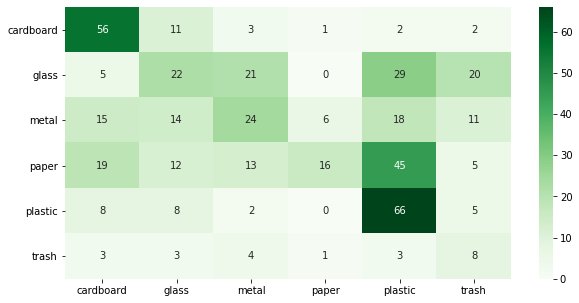

In [14]:
plt.figure(figsize = (10, 5))
sns.heatmap(matrizConfusion, cmap="Greens", annot=True, 
            xticklabels = ["cardboard","glass","metal","paper","plastic","trash"],
            yticklabels = ["cardboard","glass","metal","paper","plastic","trash"]);
plt.savefig("conf matrix")

In [15]:
clases = ["cardboard","glass","metal","paper","plastic","trash"]
#Comprobando fiabilidad del modelo
aciertos = 0;
errores = 0;
totales = len(prediccionBayes)
i = 0
for valorPredecido in prediccionBayes:
    #Pasamos las clases a sus valores nominales
    print('Se ha predecido que la imagen es:\033[1m', clases[valorPredecido], '\033[0m Deberia ser:\033[1m', clases[y_test[i]], '\033[0m')
    if valorPredecido == y_test[i]:
        print('\033[92mACIERTO!\033[0m')
        aciertos = aciertos+1
    else:
        print('\033[91mERROR\033[0m')
        errores = errores+1
    i = i+1

Se ha predecido que la imagen es: plastic  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: glass 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: cardboard 
ACIERTO!
Se ha predecido que la imagen es: glass  Deberia ser: metal 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: plastic 
ACIERTO!
Se ha predecido que la imagen es: trash  Deberia ser: trash 
ACIERTO!
Se ha predecido que la imagen es: plastic  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predecido que la imagen es: metal  Deberia ser: metal 
ACIERTO!
Se ha predecido que la imagen es: plastic  Deberia ser: metal 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: plastic 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: plastic 
ACIERTO!
Se ha predecido que la imagen es: metal  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: metal 
ERROR
Se ha predec

ACIERTO!
Se ha predecido que la imagen es: trash  Deberia ser: glass 
ERROR
Se ha predecido que la imagen es: trash  Deberia ser: metal 
ERROR
Se ha predecido que la imagen es: trash  Deberia ser: metal 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: trash 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: trash 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: plastic 
ACIERTO!
Se ha predecido que la imagen es: trash  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: cardboard 
ACIERTO!
Se ha predecido que la imagen es: cardboard  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: cardboard 
ACIERTO!
Se ha predecido que la imagen es: cardboard  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: cardboard 
ACIERTO!
Se ha predecido que la imagen es: glass  Deberia ser: plastic 

In [16]:
print('Se han predecido correctamente',aciertos,'imágenes')
print('Se han predecido erróneamente',errores,'imágenes\n')
porcentajeAcierto = (aciertos/totales)*100
porcentajeError = (errores/totales)*100
print('El porcentaje de acierto ha sido del:',round(porcentajeAcierto,2),'%')
print('El porcentaje de error ha sido del:',round(porcentajeError,2),'%')

Se han predecido correctamente 192 imágenes
Se han predecido erróneamente 289 imágenes

El porcentaje de acierto ha sido del: 39.92 %
El porcentaje de error ha sido del: 60.08 %


### 2) Elige 5 imágenes de diferentes residuos que no hayas usado ni para entrenar ni para validar el modelo y clasifícalas. Utiliza el modelo que consideres que clasifica mejor obtenido en el punto anterior. Indica con qué error ha funcionado el clasificador.

In [17]:
#Predecir los valores para el conjunto de datos en X_val y compararlos con y_val
predicciones = gnb.predict(X_val)

#Comprobando fiabilidad del modelo
aciertos = 0;
errores = 0;
totales = len(predicciones)
i = 0
for valorPredecido in predicciones:
    #Pasamos las clases a sus valores nominales
    print('Se ha predecido que la imagen es:\033[1m', clases[valorPredecido], '\033[0m Deberia ser:\033[1m', clases[y_test[i]], '\033[0m')
    if valorPredecido == y_test[i]:
        print('\033[92mACIERTO!\033[0m')
        aciertos = aciertos+1
    else:
        print('\033[91mERROR\033[0m')
        errores = errores+1
    i = i+1

Se ha predecido que la imagen es: metal  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: glass 
ERROR
Se ha predecido que la imagen es: paper  Deberia ser: cardboard 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: metal 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: plastic 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: trash 
ERROR
Se ha predecido que la imagen es: glass  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: metal 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: metal 
ERROR
Se ha predecido que la imagen es: glass  Deberia ser: metal 
ERROR
Se ha predecido que la imagen es: metal  Deberia ser: plastic 
ERROR
Se ha predecido que la imagen es: paper  Deberia ser: plastic 
ERROR
Se ha predecido que la imagen es: cardboard  Deberia ser: paper 
ERROR
Se ha predecido que la imagen es: plastic  Deberia ser: metal 
ERROR
Se ha predecido que la ima

In [20]:
print('Se han predecido correctamente',aciertos,'imágenes')
print('Se han predecido erróneamente',errores,'imágenes\n')
porcentajeAcierto = (aciertos/totales)*100
porcentajeError = (errores/totales)*100
print('\033[92mEl porcentaje de acierto ha sido del:',round(porcentajeAcierto,2),'%\033[0m')
print('\033[91mEl porcentaje de error ha sido del:',round(porcentajeError,2),'%\033[0m')

Se han predecido correctamente 2 imágenes
Se han predecido erróneamente 23 imágenes

El porcentaje de acierto ha sido del: 8.0 %
El porcentaje de error ha sido del: 92.0 %


## Conclusión

Este clasificador es... literalmente una basura